<h1> Проектная работа в интернет-магазине «Стримчик» </h1>

<strong>Описание проекта: </strong>
<p>Мы проводим исследование в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</p>

<strong>Задача: </strong>
    <p>Оценить успешность платформ, жанров для игры в разных регионах. Выявить закономерности, а так же определить, какой продукт будет наиболее потенциальным, при планированит рекламных кампаний на 2017 год.</p>

<strong>Этапы работы с датасетом:</strong>
<ol>
    <li>Оценка на наличие: Дубликатов, пропусков, аномальных значений, формата значений.</li>
    <li>Проверка на наличие аномальных значений</li>
    <li>Исследовательский анализ: пределение факторов, влияющих на продажи, определение лидеров продаж</li>
    <li>Составление портрета пользователя из разных регионов</li>
    <li>Формулировка, проверка нулевых и альтернативных гипотез</li>
    <li>Составление общего вывода</li>
</ol>

<h3> Шаг 1. Откройте файл с данными и изучите общую информацию </h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

<h3> Шаг 2. Подготовьте данные </h3>

<h4> Замените названия столбцов (приведите к нижнему регистру) </h4>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.columns = data.columns.str.lower()

In [5]:
print( 'Кол-во дубликатов в датасете:', data.duplicated().sum())

Кол-во дубликатов в датасете: 0


In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<h4>Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему </h4>

<strong> Преобразовывать типы данных будем у следующих столбцов: </strong>
<ul>
   <li> year_of_release	 - так как значения относятся к дискретному типу, то следует преобразовать их в int (Посещает мысль преобразовать в DateTime, но думаю в этом нет необходимости.)</li>
    <p></p>
   <li> user_score - так как значения относятся к типу object, то следует преобразовать их в float</li>
</ul>


Заполним значения столбца 'year_of_release' в int, при этом оставим пропуски как есть, не заполняя их 0.Так как это может повлиять на показатели в исследовании.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Проверим уникальзые значения столбца 'user_score':

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В середине массива таится значение "tbd". Инофрмация на игровых форумах гласит, что данная аббревиатура означает "Подлежит обсуждению" Поссмотрим, сколько строк с таким значением всего:

In [9]:
data.query('user_score == "tbd"')['user_score'].count()

2424

2424 строки со значением "tbd". Данная аббревиатура нам ни о чем не говорит, кроме того, что рейтинга у игры среди пользователей на данный момент нет. Это значит, что при переводе формата данных в float на 2424 значения будет меньше.

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'],  errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Форматы значений исправленны, как и оказалось в столбце 'user_score' пропало 2424 значений.

Далее: Постмотрим на пропуски во всем датасете:

In [12]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Пропуски в значениях остались только среди оценок. Посмотрим подробнее, как это может быть связанно, используем логическую индексацию, чтоб посмотреть, зависимость пропусков 'raiting' от пропускоы в 'critic_score' и 'user_score':

In [13]:
data.loc[data['critic_score'].isna()].query('user_score > 1').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+


In [14]:
data.loc[data['user_score'].isna()].query('critic_score > 1').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.2,0.28,85.0,NaN,T
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+
440,Need for Speed III: Hot Pursuit,PS,1998,Racing,2.14,0.86,0.0,0.13,88.0,NaN,E
637,Riven: The Sequel to Myst,PC,1997,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,NaN,E


In [15]:
data.loc[data['rating'].isna()].query('user_score > 1').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
693,Tomb Raider II,PC,1997,Action,0.91,1.25,0.00,0.13,NaN,8.3,NaN
822,R4: Ridge Racer Type 4,PS,1998,Racing,0.68,0.46,0.79,0.13,88.0,9.2,NaN
1763,Football Manager 2013,PC,2012,Sports,0.00,0.95,0.00,0.21,86.0,6.7,NaN
2054,Monster Rancher,PS,1997,Simulation,0.12,0.08,0.74,0.07,86.0,8.3,NaN
3054,100 Classic Books,DS,2008,Misc,0.12,0.52,0.00,0.02,70.0,6.0,NaN


Поулучается пропуски в столбце 'rating' не связаны на прямую с пропусками в остальных столбцах, хотя и встречаются и такие примеры:

In [16]:
data.loc[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Причиной дополнительных пропусков в 'user_score' стало то, что мы заменили значения 'tbd', так как они нам ни о чем не говорят.
Конечно в датасете, где значения по рейтингу пропущенны, во всех трех столбцах, но так или иначе, мы не можем утверждать, что тут есть свзяь, так как и встречаются строки, где рейтинг есть и среди пользоватлей и среди критиков, а в самом столбце 'raiting' нет.

Далее: Для того, чтоб убедиться, что цифры в данных не содержат аномальных значений, построим диаграмму размаха для каждого series с float или int:

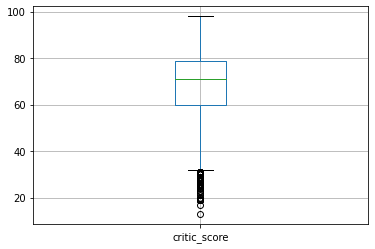

In [17]:
data.boxplot(column = ['critic_score']);

Максимальная оценка у критиков 100 баллов, значит аномалий нет.

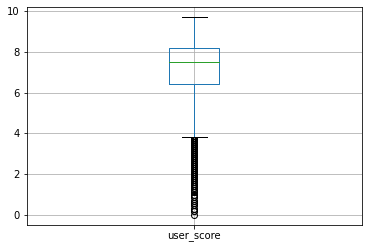

In [18]:
data.boxplot(column = ['user_score']);

Максимальная оценка у пользователей 10 балло, значит аномалий также нет.

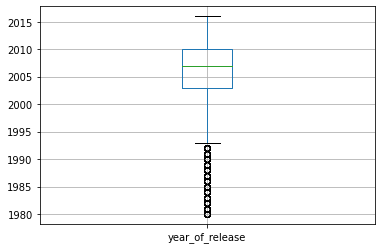

In [19]:
data.boxplot(column = ['year_of_release']);

Аномалий не наблюдается.

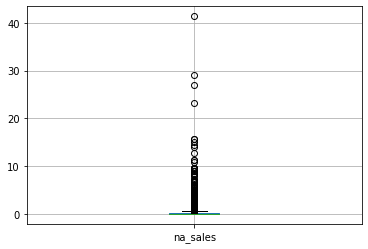

In [20]:
data.boxplot(column = ['na_sales']);

40 миллионов проданных копий достаточно много, но правдоподобно для Севенрной Америки, где население около 600 млн.

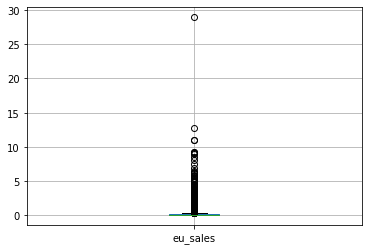

In [21]:
data.boxplot(column = ['eu_sales']);

Для европы так же такая цифры харрактерна.

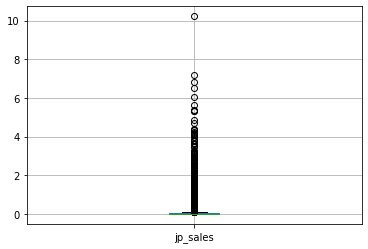

In [22]:
data.boxplot(column = ['jp_sales']);

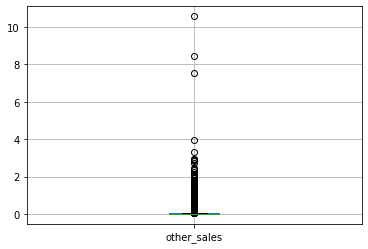

In [23]:
data.boxplot(column = ['other_sales']);

Тоже самое для Японии и остальных стран.

Таким образом мы убедились, что значения в наших данных правдободобны и не содержат аномалий, это значит, что можно заниматься исследованием.

In [24]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
def replace_missing_rating(missing_rating, value_rating):
    data['rating'] = data['rating'].replace(missing_rating, value_rating)
replace_missing_rating(np.NaN, 'unrated')

In [26]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


<strong>Возможные причины пропусков:</strong>
<ol>
    <li>year_of_releas - Пропуски можно отнести к случайным. Теоритически любая игра имеет год выпуска, поэтому, отуствие данных в этом столбце может говорить о некорректной выгрузке либо неполной информации в самих данных</li>
    <p></p>
    <li>critic_score - Ниже, мы сгрупировали значения по годам. Выяснилось, что у игр 1980-1955 в большем числе случаем отсутсует оценка. Также,большинство игр с низским кол-вом продаж, так же не имеют рейтинг. </li>
    <p></p>
    <li>user_score - часть данных пропала, псоле замены аббревиатуры "tbd", данная аббревиатура не носит количественный тип данных, а значит не поможет нам при дальнейшем анализе. Большая часть данных с 80-95 год отсутсвует, это также говорит о том, что пропуски не случайны.Скорее всего в данную эпоху времени, не было возможности онлайн оценивать игру. </li>
    <p></p>
    <li>rating - часть данных отсутсвует не случайно. Большая часть игр не имеет оценки ESRB. Мы поменили эти пропуски как "unrated", чтоб их можно было учесть в исследовании</li>
</ol>

Ниже мы можем увидеть, что отсутсвие оценок критиков и пользователей харрактерно для игр с 1980-1995 года выпуска.

In [27]:
data.groupby('year_of_release')['critic_score'].mean()

year_of_release
1980          NaN
1981          NaN
1982          NaN
1983          NaN
1984          NaN
1985    59.000000
1986          NaN
1987          NaN
1988    64.000000
1989          NaN
1990          NaN
1991          NaN
1992    85.000000
1993          NaN
1994    69.000000
1995          NaN
1996    89.875000
1997    85.294118
1998    81.821429
1999    75.769231
2000    69.349650
2001    71.414110
2002    69.046252
2003    70.181197
2004    69.393939
2005    68.819847
2006    67.338710
2007    66.180636
2008    65.904895
2009    67.554531
2010    67.482000
2011    68.692000
2012    72.984424
2013    71.278388
2014    71.065134
2015    72.871111
2016    73.155172
Name: critic_score, dtype: float64

In [28]:
data.groupby('year_of_release')['user_score'].mean()

year_of_release
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
1985    5.800000
1986         NaN
1987         NaN
1988    2.200000
1989         NaN
1990         NaN
1991         NaN
1992    8.200000
1993         NaN
1994    6.300000
1995         NaN
1996    8.400000
1997    8.472222
1998    8.506452
1999    8.480645
2000    7.531776
2001    7.594942
2002    7.585129
2003    7.859884
2004    7.750511
2005    7.509605
2006    7.247283
2007    6.895707
2008    6.950983
2009    6.990717
2010    6.875375
2011    6.623553
2012    6.817404
2013    6.470724
2014    6.580243
2015    6.665993
2016    6.629771
Name: user_score, dtype: float64

Отсортировав данные по убыванию, мы видим, что отсутсвие рейтинга в подобляющем числе случаев харрактерно для игр, у которых низкое кол-во продаж. Возможно причиной отсутсвия данных является недостаточное кол-во пользователей, на основе которых можено составить рейтинг и общие оценки.

<h4> Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец. </h4>

In [29]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [30]:
data.sort_values(by = 'total_sales', ascending = True).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.0,NaN,NaN,unrated,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,NaN,NaN,unrated,0.00
16181,Sakura Sakura: Haru Urara,PSP,2010,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,unrated,0.01
16180,WRC: FIA World Rally Championship,PC,<NA>,Racing,0.00,0.01,0.00,0.0,65.0,NaN,RP,0.01
16179,Pro Angler Moves,PS3,2012,Sports,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01
16178,Egg Mania: Eggstreme Madness,XB,2002,Puzzle,0.01,0.00,0.00,0.0,58.0,NaN,E,0.01
16177,Destiny Links,DS,2009,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,unrated,0.01
16176,Fab 5 Soccer,DS,2008,Sports,0.01,0.00,0.00,0.0,NaN,NaN,E,0.01
16175,Psycho-Pass,XOne,2014,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,unrated,0.01
16174,50 Classic Games,3DS,2012,Misc,0.00,0.01,0.00,0.0,NaN,NaN,unrated,0.01


<h3> Шаг 3. Проведите исследовательский анализ данных </h3>

<h4> Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? </h4>

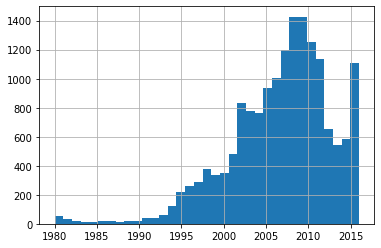

In [31]:
data['year_of_release'].hist(bins = 35);

Больше всего игр было выпущенно между 2005 и 2010 годами. Так как игровая индустрия сильно изменилась с начала 1980, можно предположить, что данные за все периоды не так важны. Первые 15 лет сильно не повлияют на статистику послидних 15 - ти лет.

<h4> Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? </h4>

In [32]:
head_games = data.sort_values(by = 'total_sales', ascending = False).head(20)
# Сортируем 20 самых продаваемых игр

In [33]:
platform_list = head_games['platform'].value_counts().index.values
# Записываем их в переменную 'platform_list' как список

In [34]:
data_head_platform =data.query('platform in @platform_list')
#Получаем срез с платформами из списка 'platform_list'

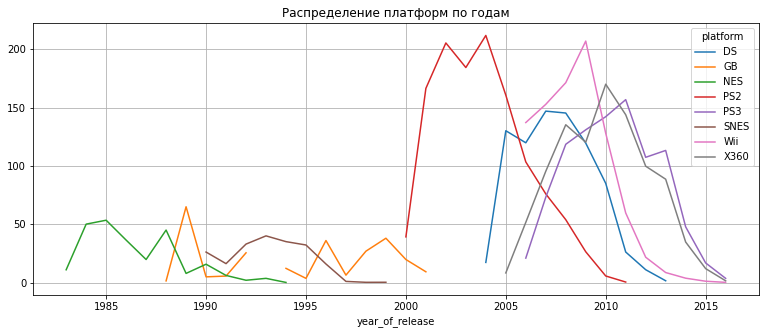

In [35]:
(
    data_head_platform.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = ('sum'))
    .plot(grid=True, figsize=(13, 5), title = 'Распределение платформ по годам')
);

Примерно за 10 лет исчезают платформы и на замену им приходят новые. Но есть и исключения. Плтаформа 'GB' продержалась почти 15 лет. Учитывая эти данные, стоит понимать, что последние 20 лет скачек технологий значительно выше, чем за предыдушие 20 лет, это говорит о том, что изменения в индустрии видеоигр будут также рости, поэтому интрервал замены платформ будет ниже.

<h4> Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. </h4>

<h4> Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. </h4>

In [36]:
actual_data = data.query('year_of_release > 2013')

Актуальный период возьмем после 2013 года, хотя для прогноза на 2017 год, целесообразно учитывать только 2016. Но возьмем 3 года, чтоб посмотреть как изменялась динамика.

In [37]:
head_games_actual = actual_data.sort_values(by = 'total_sales', ascending = False).head(20)
# Сортируем 20 самых продаваемых игр за последние 3 года

In [38]:
platform_list_actual = head_games_actual['platform'].value_counts().index.values
# Записываем их в переменную 'platform_list_actual' как список

In [39]:
data_head_platform_actual = data.query('platform in @platform_list_actual & year_of_release > 2013')
#Получаем срез с платформами из списка 'platform_list_actual'

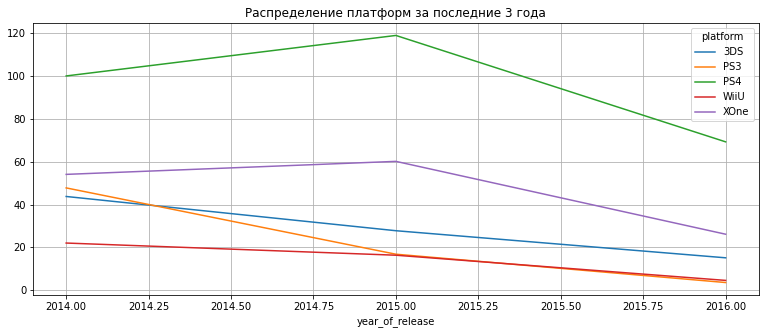

In [40]:
(
    data_head_platform_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = ('sum'))
    .plot(grid=True, figsize=(13, 5), title = 'Распределение платформ за последние 3 года')
);

Лидерами платформ за последние 3 года являются PS4,  Xbox One и Nintendo 3DS. Тенденция роста к 16 году уже отрицательная. Не смотря на это, потомки PS4 и XOne придут на рынок только к 2020 году, это значит что данные платформы продолжат быть основными на рынке в следующие 3 года.

<h4> Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. </h4>

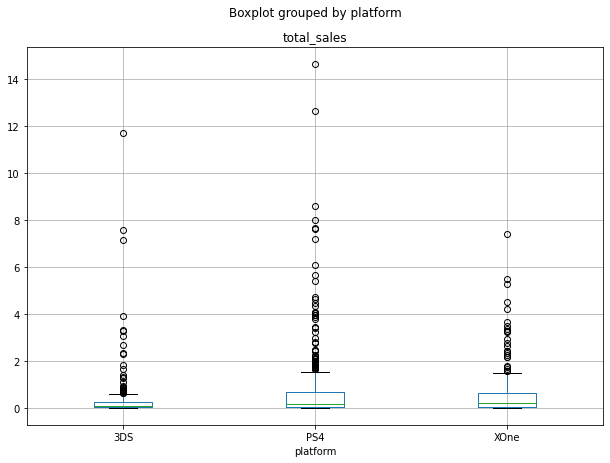

In [41]:
(
    actual_data.query('platform == ["PS4","XOne","3DS"]')
    .boxplot(column='total_sales', by='platform', figsize =(10,7))
);

In [42]:
actual_data.query('platform == "PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [43]:
actual_data.query('platform == "XOne"')['total_sales'].describe()

count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

In [44]:
actual_data.query('platform == "3DS"')['total_sales'].describe()

count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

Наибольшая общая стоимость продаж игры имеет платформа PS4 - 14.5  миллионов продаж. Далее платформа 3DS - 11.9 млн. 
75% Игр у PS4 проданны в размере до 700 тыс, в то время как медиана держится около 185 тыс.
75% Игр у XOne проданны в размере до 600 тыс, в то время как медиана держится около 205 тыс.
75% Игр у 3DS проданны в размере до 250 тыс, в то время как медиана держится около 90 тыс.

<h4> Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. </h4>

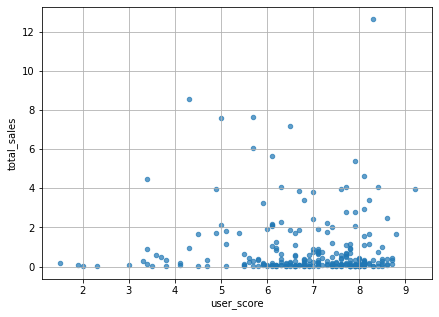

In [45]:
(
    actual_data.query('platform == "PS4"')
    .plot(x='user_score', y='total_sales', kind='scatter',figsize=(7, 5), grid=True, alpha = 0.7)
);

In [46]:
actual_data.query('platform == "PS4"')['user_score'].corr(actual_data.query('platform == "PS4"')['total_sales'])

-0.040131589472697356

Корреляция равна -0.04, это означает, что зависимости продаж от оценки пользователей почти нет.

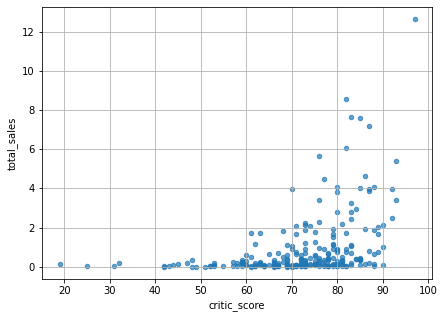

In [47]:
(
    actual_data.query('platform == "PS4"')
    .plot(x='critic_score', y='total_sales', kind='scatter',figsize=(7, 5), grid=True, alpha = 0.7)
);

In [48]:
actual_data.query('platform == "PS4"')['critic_score'].corr(actual_data.query('platform == "PS4"')['total_sales'])

0.40266141068104083

Корреляция равна 0.4, это означает, что зависимость продаж от оценки критиков есть и она средняя положительная.

<h4> Соотнесите выводы с продажами игр на других платформах. </h4>

In [49]:
actual_data.groupby('platform')['total_sales'].mean().sort_values(ascending = False)

platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64

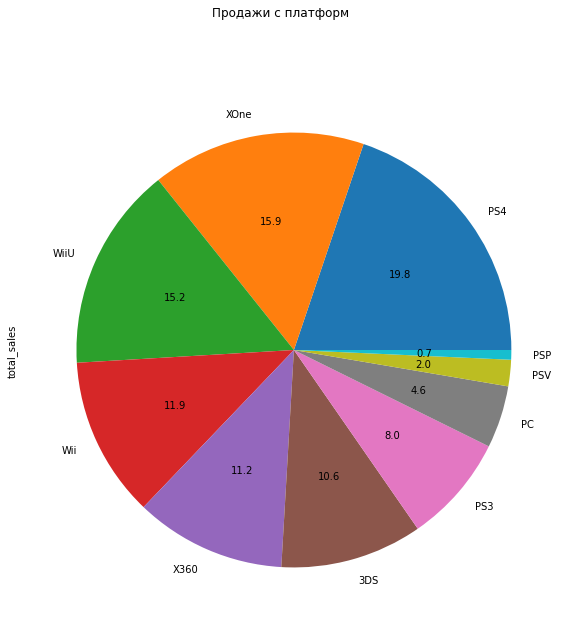

In [50]:
(
    actual_data.groupby('platform')['total_sales'].mean().sort_values(ascending = False)
    .plot.pie(subplots=True, figsize=(15, 10), autopct="%.1f", fontsize=10, title = 'Продажи с платформ') 
);

<strong> Наиболее прибыльными платформами являются: </strong>
<ul>
   <li> PS4 - 766 тыс.среднее число продаж во всем мире.</li>
    <p></p>
   <li> XOne - 615 тыс.среднее число продаж во всем мире.</li>
</ul>
<p> Этому есть объяснение, так как данные бренды являются лидирующими на рынке игровых платформ.</p>
<p></p>
<strong> Наименее прибыльными платформами являются: </strong>
<ul>
   <li> PSV - 75 тыс.среднее число продаж во всем мире.</li>
    <p></p>
   <li> PSP - 27 тыс.среднее число продаж во всем мире.</li>
</ul>

<h4> Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? </h4>

In [51]:
actual_data.groupby('genre')['total_sales'].mean().sort_values(ascending = False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64

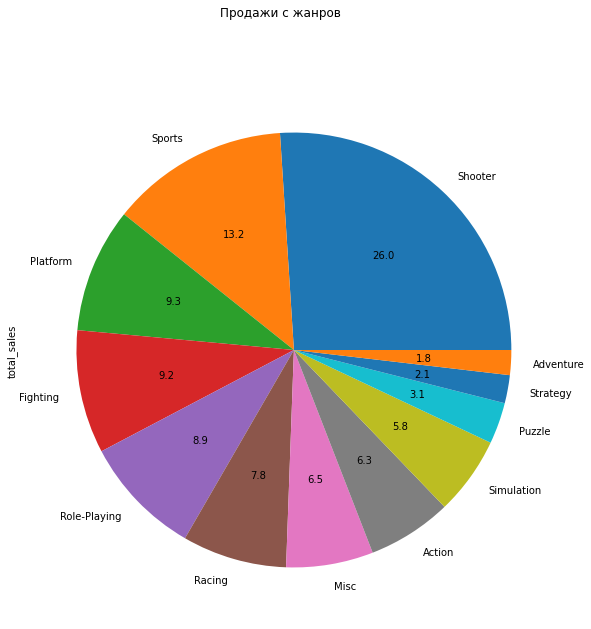

In [52]:
(
    actual_data.groupby('genre')['total_sales'].mean().sort_values(ascending = False)
    .plot.pie(subplots=True, figsize=(15, 10), autopct="%.1f", fontsize=10, title = 'Продажи c жанров')   
);

<strong> Наиболее прибыльными жанрами являются: </strong>
<ul>
   <li> Shooter	 - 1 Млн. 335 тыс. среднее число продаж во всем мире.</li>
    <p></p>
   <li> Sports - 680 тыс. среднее число продаж во всем мире.</li>
</ul>

<p></p>
<strong> Наименее прибыльными жанрами являются: </strong>
<ul>
   <li> Strategy - 107 тыс. среднее число продаж во всем мире.</li>
    <p></p>
   <li> Adventure - 94 тыс. среднее число продаж во всем мире.</li>
</ul>




<h3> Шаг 4. Составьте портрет пользователя каждого региона </h3>

<h4> Определите для пользователя каждого региона (NA, EU, JP): </h4>

<h5> Самые популярные платформы (топ-5). Опишите различия в долях продаж.</h5>

In [53]:
na_platform = actual_data.groupby('platform').agg({'na_sales':'sum'}).sort_values(by ='na_sales',ascending = False).head()

In [54]:
na_platform['percent_sales'] = ((na_platform['na_sales']/na_platform['na_sales'].sum())*100).round(1).astype(str) + '%'

In [55]:
na_platform

,na_sales,percent_sales
platform,,
PS4,98.61,39.0%
XOne,81.27,32.1%
X360,28.30,11.2%
3DS,22.64,9.0%
PS3,22.05,8.7%


В Северной Америке 71% продаж занимают платформы PS4 И XOne (произвоство США). И лишь остальные 29 % делят между собой X360, PS3 и 3DS.

<h5> Самые популярные жанры (топ-5). Поясните разницу. </h5>

In [56]:
na_genre = actual_data.groupby('genre').agg({'na_sales':'sum'}).sort_values(by ='na_sales',ascending = False).head()

In [57]:
na_genre['percent_sales'] = ((na_genre['na_sales']/na_genre['na_sales'].sum())*100).round(1).astype(str) + '%'

In [58]:
na_genre

,na_sales,percent_sales
genre,,
Shooter,79.02,32.1%
Action,72.53,29.5%
Sports,46.13,18.7%
Role-Playing,33.47,13.6%
Misc,15.05,6.1%


В Северной Америке 62% продаж занимают платформы Shooter И Action. И лишь остальные 38 % делят между собой Sports, Role-Playing	 и Misc. Как правило игры жанра Shooter и Action отличаются своим гемплеем от остальных жанров, тем самым пользуясь более выским спросом.

<h5> Влияет ли рейтинг ESRB на продажи в отдельном регионе? </h5>

In [59]:
na_rating = actual_data.groupby('rating').agg({'na_sales':'sum'}).sort_values(by ='na_sales',ascending = False)

In [60]:
na_rating['percent_sales'] = ((na_rating['na_sales']/na_rating['na_sales'].sum())*100).round(1).astype(str) + '%'

In [61]:
na_rating

,na_sales,percent_sales
rating,,
M,96.42,33.9%
unrated,64.72,22.8%
E,50.74,17.9%
T,38.95,13.7%
E10+,33.23,11.7%


В Северной Америке 34% продаж приходится на игры с рейтингом 'M', а то есть игры для взрослых. Далее 23% продаж на игры с неопределенным рейтингом, потом 17% на игры для всех, и меньше всего на игры для детей от 10 лет.

Теперь посмотрим, харрактерны ли такие результаты для Европы и Японии

<h5> Самые популярные платформы (топ-5). Опишите различия в долях продаж.</h5>

In [62]:
eu_platform = actual_data.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by ='eu_sales',ascending = False).head()

In [63]:
eu_platform['percent_sales'] = ((eu_platform['eu_sales']/eu_platform['eu_sales'].sum())*100).round(1).astype(str) + '%'

In [64]:
eu_platform

,eu_sales,percent_sales
platform,,
PS4,130.04,55.1%
XOne,46.25,19.6%
PS3,25.54,10.8%
PC,17.97,7.6%
3DS,16.12,6.8%


В Европе 74% продаж занимают платформы PS4 И XOne. И лишь остальные 26 % делят между собой  PS3, PC	 и 3DS.

<h5> Самые популярные жанры (топ-5). Поясните разницу. </h5>

In [65]:
eu_genre = actual_data.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by ='eu_sales',ascending = False).head()

In [66]:
eu_genre['percent_sales'] = ((eu_genre['eu_sales']/eu_genre['eu_sales'].sum())*100).round(1).astype(str) + '%'

In [67]:
eu_genre

,eu_sales,percent_sales
genre,,
Action,74.68,32.7%
Shooter,65.52,28.7%
Sports,45.73,20.0%
Role-Playing,28.17,12.3%
Racing,14.13,6.2%


В Европе 61% продаж занимают платформы Shooter И Action. И лишь остальные 39 % делят между собой Sports, Role-Playing	 и Racing. Как правило игры жанра Shooter и Action отличаются своим гемплеем от остальных жанров, тем самым пользуясь более выским спросом.

<h5> Влияет ли рейтинг ESRB на продажи в отдельном регионе? </h5>

In [68]:
eu_rating = actual_data.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by ='eu_sales',ascending = False)

In [69]:
eu_rating['percent_sales'] = ((eu_rating['eu_sales']/eu_rating['eu_sales'].sum())*100).round(1).astype(str) + '%'

In [70]:
eu_rating

,eu_sales,percent_sales
rating,,
M,93.44,34.5%
unrated,58.95,21.8%
E,58.06,21.4%
T,34.07,12.6%
E10+,26.16,9.7%


В Европе 34.5% продаж приходится на игры с рейтингом 'M', а то есть игры для взрослых. Далее 21% продаж на игры с неопределенным рейтингом, потом 21% на игры для всех, и меньше всего на игры для детей от 10 лет. Разницы с Северной Америкой практически нет.

In [71]:
jp_platform = actual_data.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by ='jp_sales',ascending = False).head()

In [72]:
jp_platform['percent_sales'] = ((jp_platform['jp_sales']/jp_platform['jp_sales'].sum())*100).round(1).astype(str) + '%'

In [73]:
jp_platform

,jp_sales,percent_sales
platform,,
3DS,44.24,47.9%
PS4,15.02,16.3%
PSV,14.54,15.7%
PS3,11.22,12.2%
WiiU,7.31,7.9%


В Японии 47% продаж занимает отечественная (Японская) платформа  3DS, следующие 44% делят между собой платформы серии sony (также Японские) и лишь остальные 8 % занимает WiiU (Китай).

<h5> Самые популярные жанры (топ-5). Поясните разницу. </h5>

In [74]:
jp_genre = actual_data.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by ='jp_sales',ascending = False).head()

In [75]:
jp_genre['percent_sales'] = ((jp_genre['jp_sales']/jp_genre['jp_sales'].sum())*100).round(1).astype(str) + '%'

In [76]:
jp_genre

,jp_sales,percent_sales
genre,,
Role-Playing,31.16,40.2%
Action,29.58,38.1%
Fighting,6.37,8.2%
Misc,5.61,7.2%
Shooter,4.87,6.3%


В Европе 78% продаж занимают платформы Role-Playing И Action. И лишь остальные 22 % делят между собой Fighting, Role-Misc и  популярный в США и Европе Shooter. Лидером жанров является RP игры, вероятно, это связанно с особенностями Японской культуры, которая далека от Западной.

<h5> Влияет ли рейтинг ESRB на продажи в отдельном регионе? </h5>

In [77]:
jp_rating = actual_data.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by ='jp_sales',ascending = False)

In [78]:
jp_rating['percent_sales'] = ((jp_rating['jp_sales']/jp_rating['jp_sales'].sum())*100).round(1).astype(str) + '%'

In [79]:
jp_rating

,jp_sales,percent_sales
rating,,
unrated,56.90,61.1%
T,14.78,15.9%
E,8.94,9.6%
M,8.01,8.6%
E10+,4.46,4.8%


В Японии 61% продаж приходится на игры с неопределенным рейтингом 'unrated'. Далее 16% продаж на игры для подростков, потом 9% на игры для всех, и меньше всего на игры для детей от 10 лет. Япония опережает Европу и США по количеству игр без ESRB рейтинга.

<h3> Шаг 5. Проверьте гипотезы </h3>

In [80]:
from scipy import stats as st

<strong>Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</strong>

<p>H_0: Среднее значение (user_raiting) у платформ "Xbox One" = Среднее значение (user_raiting)  у платформ "PC"</p>
<p>H_a: Среднее значение (user_raiting) у платформ "Xbox One" ≠ Среднее значение (user_raiting)  у платформ "PC"</p>

In [81]:
pc_rating = actual_data.query('platform == "PC" & user_score > 0.1')['user_score']
#Добавил условие "user_score > 0.1" так, как results.pvalue возвращал nan 

In [82]:
xone_rating = actual_data.query('platform == "XOne" & user_score > 0.1')['user_score']
#Добавил условие "user_score > 0.1" так, как results.pvalue возвращал nan 

In [83]:
results = st.ttest_ind(pc_rating,xone_rating)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<strong>Вывод по первой гипотезе:</strong>
<p>Результат показал, что значение p-value = 0.10450507919348415</p>
<p>Это говорит о том, что мы не можем отвергнуть нулевую гипотезу о равенстве рейтингов у платформ "Xbox One" и "PC"</p>

<strong>Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports  разные;</strong>

<p>H_0: Среднее значение (user_raiting) у жанров "Action" = Среднее значение (user_raiting)  у жанров "Sports"</p>
<p>H_a: Среднее значение (user_raiting) у жанров "Action" ≠ Среднее значение (user_raiting)  у жанров "Sports"</p>

In [84]:
action_rating = actual_data.query('genre == "Action" & user_score > 0.1')['user_score']

In [85]:
sports_rating = actual_data.query('genre == "Sports" & user_score > 0.1')['user_score']

In [86]:
results = st.ttest_ind(action_rating,sports_rating)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.8711147985105864e-19
Отвергаем нулевую гипотезу


<strong>Вывод по первой гипотезе:</strong>
<p>Результат показал, что значение p-value = 2.8711147985105864e-19 </p>
<p>Это говорит о том, что мы отвергаем нулевую гипотезу о равенстве рейтингов у жанров "Sports" и "Action"</p>

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

<strong> Поясните: </strong>
<ul>
<li> Как вы сформулировали нулевую и альтернативную гипотезы.</li>
<li> Какой критерий применили для проверки гипотез и почему. </li>
</ul>

Для проверки гипотез был выбран Т-тест ttest_ind для средних двух независимых выборок. Это двусторонний тест для нулевой гипотезы о том, что две независимые выборки имеют идентичные средние (ожидаемые) значения. Мы можем использовать этот тест, так как имеем дело с двумя независимыми выборками.

Пороговое значение alpha = 0.05

### Общий вывод
<p><b>Больше всего игр было выпущенно между 2005 и 2010 годами.</b> При этом, актуальные данные можно использовать только за последние несколько лет. Так как в связи с развитием индустрии видеоигры, на замену все быстрее приходят новые платформы, жанры.<p>

<p><b>Примерно за 10 лет исчезают платформы и на замену им приходят новые.</b> Но есть и исключения. Плтаформа 'GB' продержалась почти 15 лет. Учитывая эти данные, стоит понимать, что последние 20 лет скачек технологий значительно выше, чем за предыдушие 20 лет, это говорит о том, что изменения в индустрии видеоигр будут тажке расти.<p>

<p><b>Лидерами платформ за последние 3 года являются PS4,  Xbox One и Nintendo 3DS</b>. Тенденция роста к 16 году уже отрицательная. Не смотря на это, потомки PS4 и XOne придут на рынок только к 2020 году, это значит что данные платформы продолжат быть основными на рынке в следующие 3 года. <p>

<p>Наибольшая общая стоимость продаж игры имеет платформа PS4 - 14.5  миллионов продаж. Далее платформа 3DS - 11.9 млн.</p>
<ul> 
<li>75% Игр у PS4 проданны в размере до 700 тыс, в то время как медиана держится около 185 тыс.</li>
<li>75% Игр у XOne проданны в размере до 600 тыс, в то время как медиана держится около 205 тыс.</li>
<li>75% Игр у 3DS проданны в размере до 250 тыс, в то время как медиана держится около 90 тыс.</li>
</ul>

<p>Корреляция оценки польователей и продаж равна -0.04, это означает, что зависимости продаж от оценки пользователей почти нет.</p>

<p>Корреляция оценки критиков и продаж равна -0.04, 0.4, это означает, что зависимость продаж от оценки критиков есть и она средняя положительная.</p>

<strong> Наиболее прибыльными платформами являются: </strong>
<ul>
   <li> PS4 - 766 тыс.среднее число продаж во всем мире.</li>
    <p></p>
   <li> XOne - 615 тыс.среднее число продаж во всем мире.</li>
</ul>
<p> Этому есть объяснение, так как данные бренды являются лидирующими на рынке игровых платформ.</p>
<p></p>
<strong> Наименее прибыльными платформами являются: </strong>
<ul>
   <li> PSV - 75 тыс.среднее число продаж во всем мире.</li>
    <p></p>
   <li> PSP - 27 тыс.среднее число продаж во всем мире.</li>
</ul>

</ul>

<strong> Наиболее прибыльными жанрами являются: </strong>
<ul>
   <li> Shooter	 - 1 Млн. 335 тыс. среднее число продаж во всем мире.</li>
    <p></p>
   <li> Sports - 680 тыс. среднее число продаж во всем мире.</li>
</ul>

<p></p>
<strong> Наименее прибыльными жанрами являются: </strong>
<ul>
   <li> Strategy - 107 тыс. среднее число продаж во всем мире.</li>
    <p></p>
   <li> Adventure - 94 тыс. среднее число продаж во всем мире.</li>
</ul>

    
<li>Более 70% пользователей из Европы и Северной Америки предпочитают PS4 и XOne, в отличии от Японии, гдебольше всего игра покупают для отечественных PS4 и Nintendo 3DS.</li>

<li>Тоже самое и с жанрами: Около 60% в США и Европе приходится на игры с жанром Шутер и Экшен. Япония, отличается тем, что у них лидирующий игровой жанр RP.</li>

<li>Также в Америке и Европе больше всего популярны игры для взрослых. В Японии больше всего популярны игры без рейтинга ESRB. 
Меньше всего для обеих стран популярны игры для детей +10</li>
</ul>
<b>Также удалось подтвердить гипотезы:</b>
Средние пользовательские рейтинги жанров Action и Sports разные.

<b>И отвергнуть гипотезу:</b>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


<strong>Отчет о проделаных шагах:</strong>
<ul>
<li>1. Датасет изначально был оценен на наличие: Дубликатов, пропусков, аномальных значений, формата значений. </li>
<li>2. Пропуски значений были оставленны как есть. </li>
<li>3. Датасет был проверен на наличие аномальных значений. Таких не оказалось. </li>
<li>4. Формат значений был изменен со строчных на числовые.</li>
<li>5. Был добавлен новый столбец с общим количеством продаж игр.</li>
<li>6. Была произведен исследовательский анализ данных.</li>
<li>7. Был составлен портрет пользователя из разных регионов.</li>
<li>8. Были сформулированны, подтвержденны и опровергнуты нулевые гипотезы.</li>
<li>9. На основе всех наблюдений был составлен общий вывод.</li>
</ul>